In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df=pd.read_csv('placement.csv')

In [3]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\abhin\AppData\Local\Temp\ipykernel_23484\3117674948.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\abhin\AppData\Local\Temp\ipykernel_23484\3117674948.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


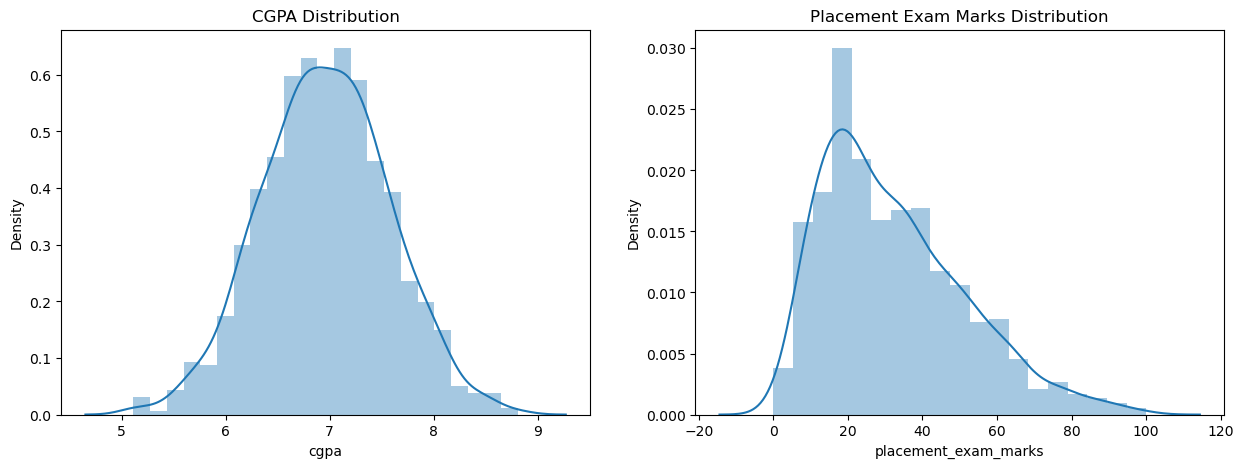

In [131]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.title('CGPA Distribution') 

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.title('Placement Exam Marks Distribution') 

plt.show()


"CGPA' follows a normal distribution, while 'placement_exam_marks' is right-skewed. Therefore, for normal distributions, we can use the three standard deviations and Z-scores. For skewed distributions (right or left), the IQR method is more appropriate."

# "Identifying and Addressing Outliers in CGPA Columns"

Once we've identified outliers, we have two options for handling them: <b>Trimming</b> and <b>Capping</b>

In data trimming, we remove data points that fall outside a specific range. Imagine you have a dataset with 1000 rows, and after analysis, you identify 5 outliers: values that are significantly higher or lower than the rest. Trimming involves removing these 5 outliers (values greater than the upper limit or less than the lower limit), resulting in a dataset with 995 rows

<b>Capping:

Capping, unlike trimming, does not remove any data points from the dataset. Instead, it replaces outlier values with a predefined limit. Imagine you have a dataset with outliers exceeding the upper limit or falling below the lower limit. Capping involves replacing these outliers with the upper limit (for high outliers) or the lower limit (for low outliers). Essentially, it caps the extreme values to fit within the defined range.

C:\Users\abhin\AppData\Local\Temp\ipykernel_23484\2887985854.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


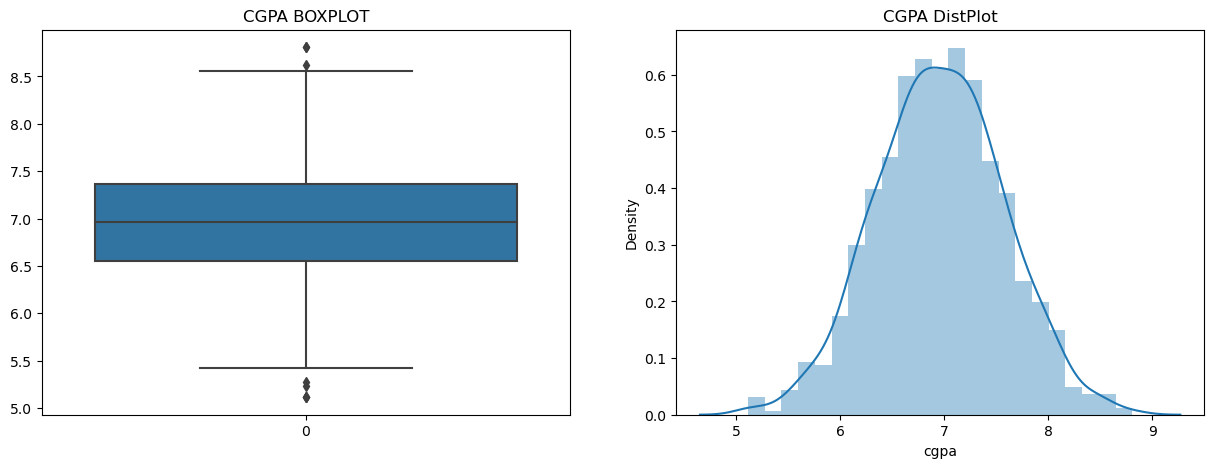

In [155]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(df['cgpa'])
plt.title('CGPA BOXPLOT') 

plt.subplot(1,2,2)
sns.distplot(df['cgpa'])
plt.title('CGPA DistPlot') 

plt.show()

In [37]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [38]:
Upper_limit=df['cgpa'].mean()+df['cgpa'].std()*3
lower_limit=df['cgpa'].mean()-df['cgpa'].std()*3

In [39]:
Upper_limit,lower_limit

(8.808933625397168, 5.113546374602832)

In [59]:
df[(df['cgpa']>Upper_limit )| (df['cgpa']<lower_limit)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming 

In [61]:
df_trim=df[(df['cgpa']<Upper_limit)&(df['cgpa']>lower_limit)]

In [63]:
df_trim[(df_trim['cgpa']>Upper_limit )| (df_trim['cgpa']<lower_limit)]

,cgpa,placement_exam_marks,placed


C:\Users\abhin\AppData\Local\Temp\ipykernel_23484\3508025771.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_trim['cgpa'])


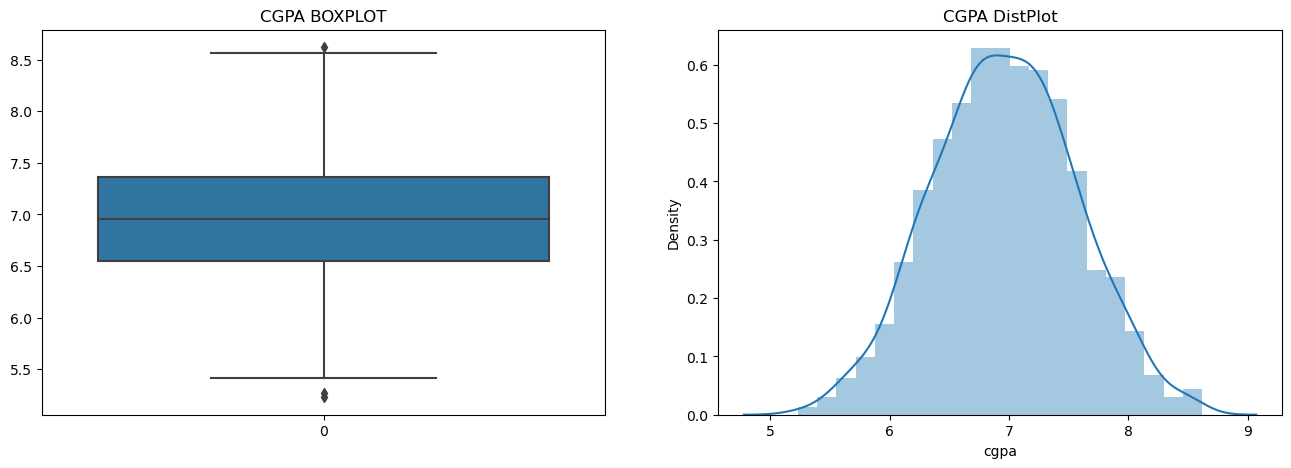

In [64]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.boxplot(df_trim['cgpa'])
plt.title('CGPA BOXPLOT') 

plt.subplot(1,2,2)
sns.distplot(df_trim['cgpa'])
plt.title('CGPA DistPlot') 

plt.show()

# Capping 

In [122]:
df['cgpa']=np.where(df['cgpa']>Upper_limit,Upper_limit,
                   np.where(df['cgpa']<lower_limit, lower_limit,
                   df['cgpa']))

In [123]:
df[(df['cgpa']>Upper_limit )| (df['cgpa']<lower_limit)]

,cgpa,placement_exam_marks,placed


C:\Users\abhin\AppData\Local\Temp\ipykernel_23484\2986255805.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


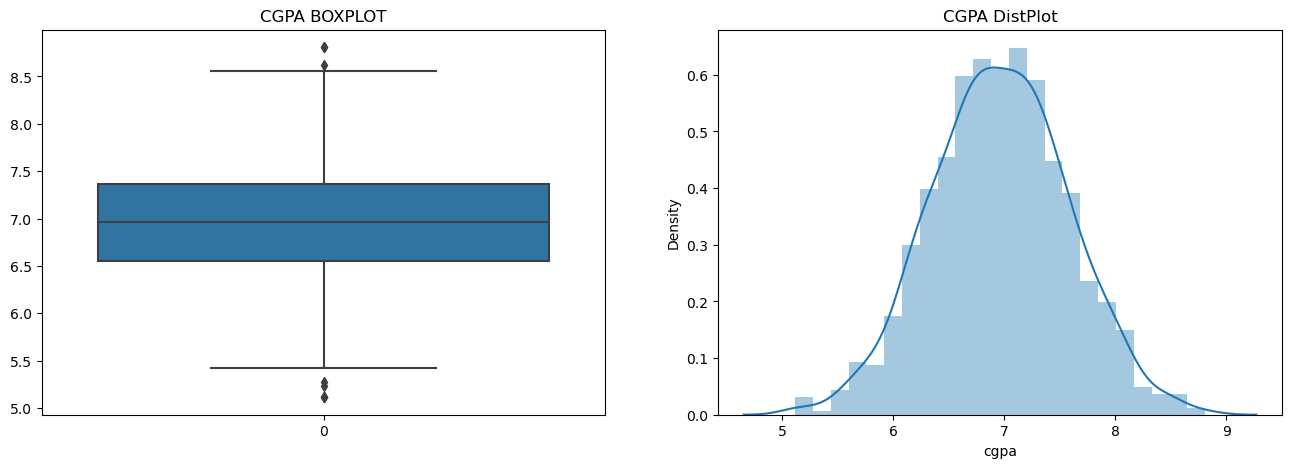

In [130]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.boxplot(df['cgpa'])
plt.title('CGPA BOXPLOT') 

plt.subplot(1,2,2)
sns.distplot(df['cgpa'])
plt.title('CGPA DistPlot') 

plt.show()

#  Handling Outliers in 'placement_exam_marks' Columns # 

C:\Users\abhin\AppData\Local\Temp\ipykernel_23484\2541405458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

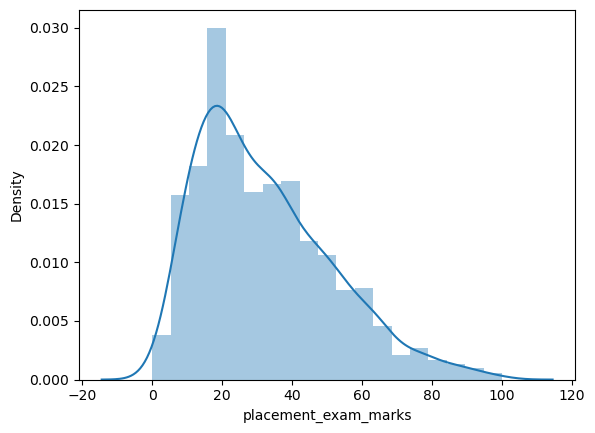

In [134]:
sns.distplot(df['placement_exam_marks'])

<Axes: >

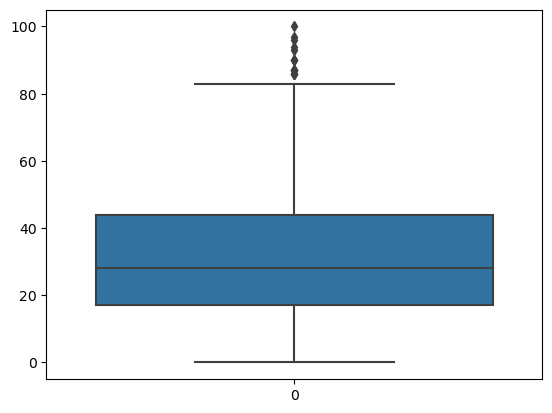

In [144]:
sns.boxplot(df['placement_exam_marks'])

In [135]:
Q1,Q3=df['placement_exam_marks'].quantile(.25),df['placement_exam_marks'].quantile(.75)

In [136]:
Q1,Q3

(17.0, 44.0)

In [142]:
Upper_limit_=Q3+((Q3-Q1)*1.5)
Lower_limit_=Q1-((Q3-Q1)*1.5)

In [143]:
Upper_limit_ , Lower_limit_

(84.5, -23.5)

In [147]:
df_trim_IQR=df[df['placement_exam_marks']<Upper_limit_]

<Axes: >

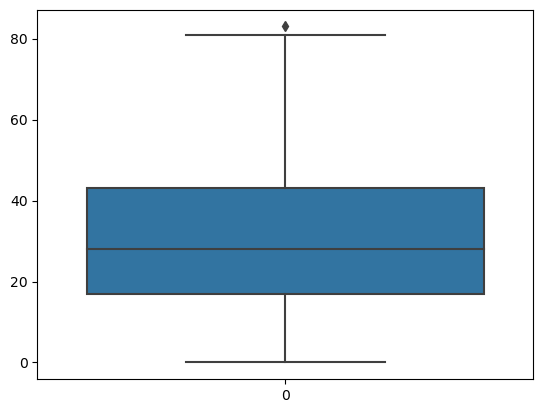

In [149]:
sns.boxplot(df_trim_IQR['placement_exam_marks'])

In [150]:
df['placement_exam_marks']=np.where(df['placement_exam_marks']>Upper_limit_,Upper_limit_,df['placement_exam_marks'])

<Axes: >

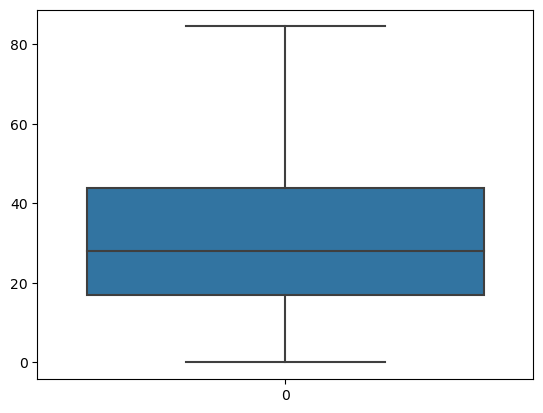

In [152]:
sns.boxplot(df['placement_exam_marks'])